<a href="https://colab.research.google.com/github/Muadali/MLA_AAD/blob/main/MLA_AAD5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Assignment 5

**Abdifatah Dahiye**

**CS430-ON**

**Machine Learning in the Cloud**

#Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for Specific Models

The models that will be used in this notebook are imported from SKLearn

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix Function

In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
     

In [7]:
def abline(slope, intercept, color):
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = intercept + slope * x_vals
  plt.plot(x_vals, y_vals, '--', c=color)

#ROC_Curve Function

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Problem 1

**Reading the Data**

In [10]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

In [11]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [12]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


#Statistical and Visual Exploration

<Axes: title={'center': 'Number of Land Types - Train'}>

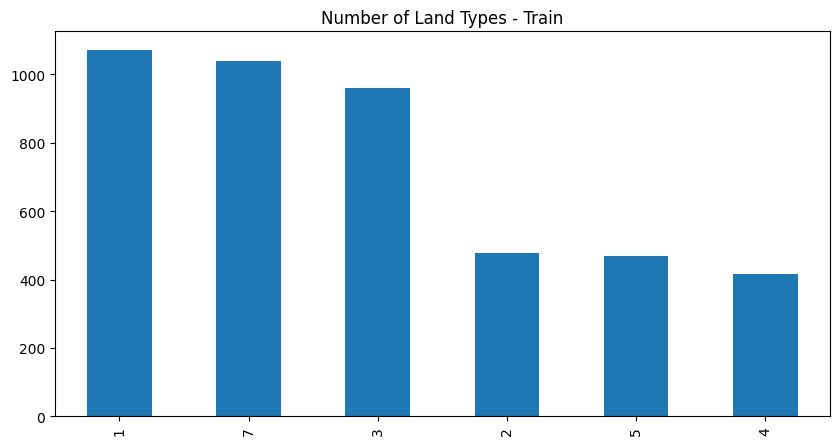

In [13]:
landsat_train['land_type'].value_counts().plot(kind='bar', figsize=(10,5), title='Number of Land Types - Train')
     

<Axes: title={'center': 'Number of Land Types - Test'}>

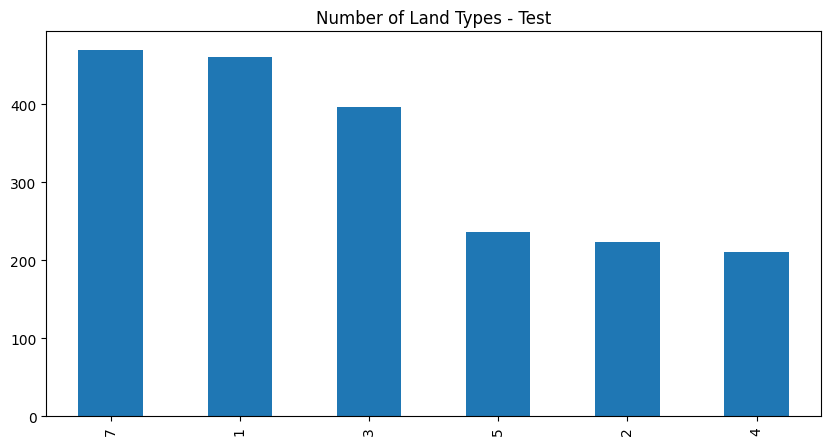

In [14]:
landsat_test['land_type'].value_counts().plot(kind='bar', figsize=(10,5), title='Number of Land Types - Test')
     


#Splitting Data into Train/Test

In [15]:
X_train = landsat_train[['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2', 'top_middle_r', 'top_middle_g', 'top_middle_infra1', 'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1', 'top_right_infra2', 'middle_left_r', 'middle_left_g', 'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r', 'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2', 'middle_right_r', 'middle_right_g', 'middle_right_infra1', 'middle_right_infra2', 'bottom_left_r', 'bottom_left_g', 'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r', 'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2', 'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1', 'bottom_right_infra2']]
     

In [16]:
X_test = landsat_test[['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2', 'top_middle_r', 'top_middle_g', 'top_middle_infra1', 'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1', 'top_right_infra2', 'middle_left_r', 'middle_left_g', 'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r', 'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2', 'middle_right_r', 'middle_right_g', 'middle_right_infra1', 'middle_right_infra2', 'bottom_left_r', 'bottom_left_g', 'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r', 'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2', 'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1', 'bottom_right_infra2']]
     


In [17]:
y_train = landsat_train[['land_type']]

In [18]:
y_test = landsat_test[['land_type']]
     

#Building the Pipeline

In [19]:
num_attribs = ['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2', 'top_middle_r', 'top_middle_g', 'top_middle_infra1', 'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1', 'top_right_infra2', 'middle_left_r', 'middle_left_g', 'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r', 'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2', 'middle_right_r', 'middle_right_g', 'middle_right_infra1', 'middle_right_infra2', 'bottom_left_r', 'bottom_left_g', 'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r', 'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2', 'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1', 'bottom_right_infra2']
     

In [20]:
col_transform = ColumnTransformer(transformers=[
                                  ('num', MinMaxScaler(), num_attribs)],
                                  remainder='passthrough'
                                  )

In [21]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=500, bootstrap=True, oob_score=True, n_jobs=-1))
                      ])

#Executing the Model

In [22]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_inf...
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

#Evaluating the Model

In [23]:
y_pred = pipeline.predict(X_test)

In [24]:
pipeline.named_steps.rf.oob_score_

0.8895152198421646

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       461
           2       0.98      0.96      0.97       224
           3       0.86      0.95      0.91       397
           4       0.72      0.59      0.65       211
           5       0.91      0.77      0.83       237
           7       0.84      0.87      0.86       470

    accuracy                           0.88      2000
   macro avg       0.88      0.85      0.86      2000
weighted avg       0.88      0.88      0.88      2000



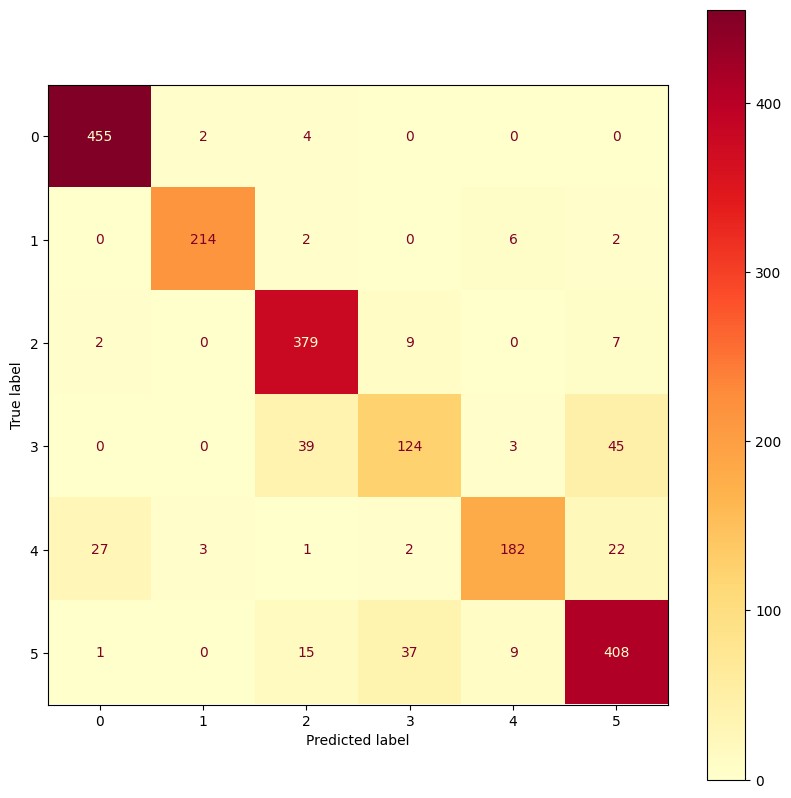

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig,ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

#Conclusion

This model appears to be fairly suitable for predicting the land type. All of the evaluation tools run on this model returned positive results.
It has an overall accuracy of 89% which is pretty good 


#Problem 2

**Building the Pipeline**

In [27]:
col_transform = ColumnTransformer(transformers=[
                                  ('num', MinMaxScaler(), num_attribs)],
                                  remainder='passthrough'
                                  )

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=100000)
svc = SVC(kernel='rbf')

In [29]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('voting_ensemble', VotingClassifier(estimators=[
                                                                      ('knn', knn),
                                                                      ('lr', lr),
                                                                      ('svc', svc)
                                                                      ], voting='hard'))
                      ])

#Executing the Model

In [30]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_inf...
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('voting_ensemble',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lr',
                                               LogisticRegression(max_iter=100000)),
                                              ('svc', SVC())]))])

#Evaluating the Model

In [31]:
y_pred = pipeline.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.97      0.97       224
           3       0.87      0.97      0.91       397
           4       0.71      0.55      0.62       211
           5       0.91      0.86      0.89       237
           7       0.84      0.86      0.85       470

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



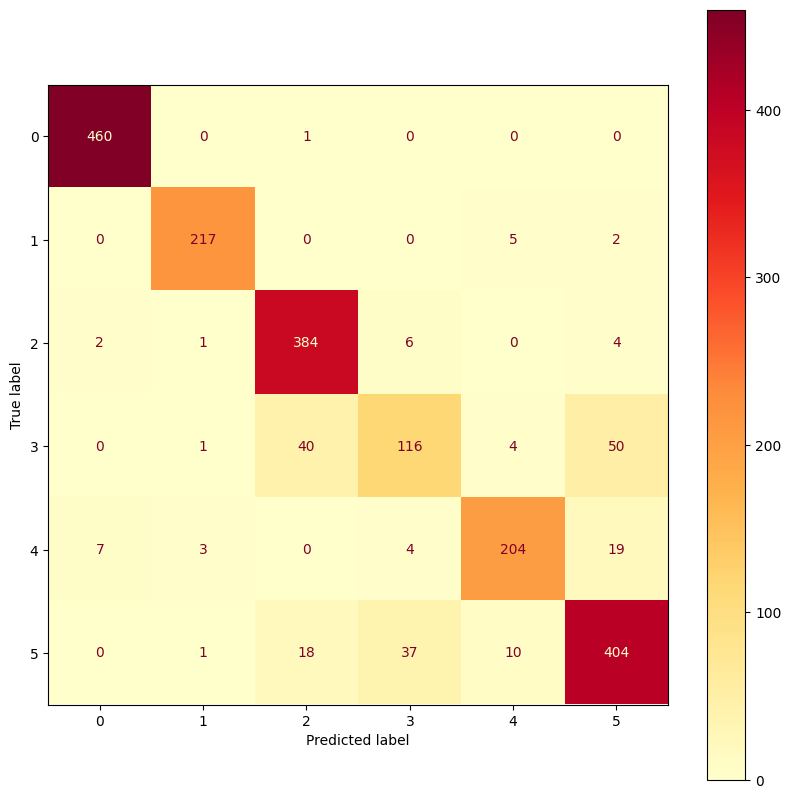

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig,ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

#Conclusion

This model appears to be suitable for predicting the land type. All of the evaluation tools run on this model returned positive results.
The precision, recall, and F1 score were above .85 for most of the land types.

#Problem 3

**Reading the Data**

In [35]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')
     

In [36]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#Splitting Data into Train/Test

In [37]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]

In [38]:
y = df[['forgery']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
     


#Building the Pipeline

In [40]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']

In [41]:
col_transform = ColumnTransformer(transformers=[
                                  ('num', MinMaxScaler(), num_attribs)]
                                  )

In [42]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=500, bootstrap=True, oob_score=True, n_jobs=-1))
                      ])
     

#Executing the Model

In [43]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

#Evaluating the Model

In [44]:
y_pred = pipeline.predict(X_test)

In [45]:
pipeline.named_steps.rf.oob_score_

0.9936189608021878

In [46]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



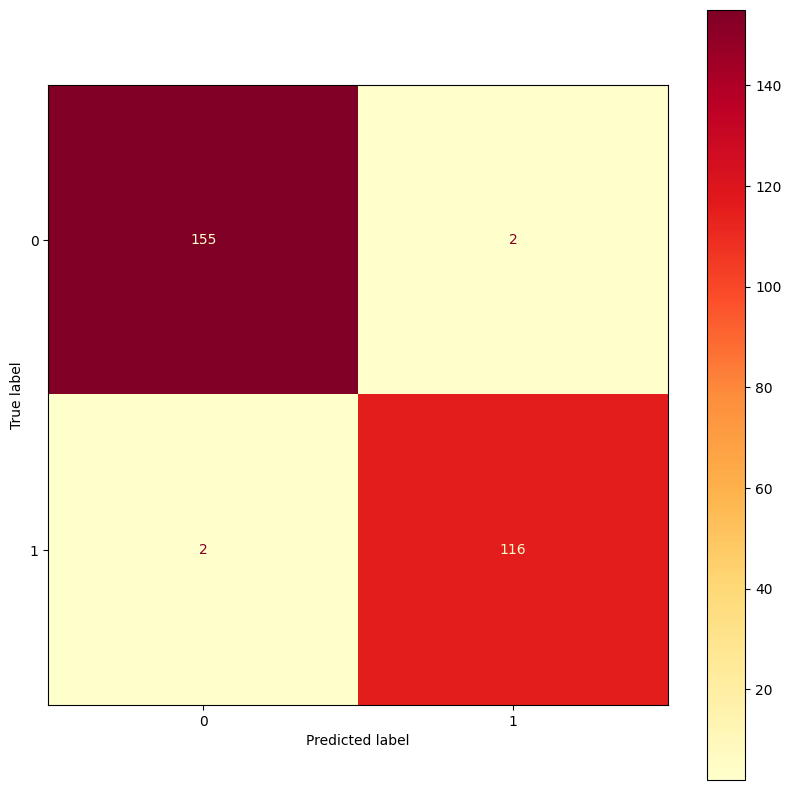

In [47]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig,ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

#Conclusion

Using a random forest classifer on the Bank forgery data set has proven to be the most suitable model yet. The other models we have used on this data set have all had very high f1 and accuracy scores, but this model is at 99% or above in every statistical category, there was little room for improvement to begin with but this model found that room and is predicting real and fake bank notes almost perfectly.